# Data Preparation



In [1]:
# Load libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [2]:
# Load data
sales_train = pd.read_csv('/content/sales_train.csv')
calendar = pd.read_csv('/content/calendar.csv')
items = pd.read_csv('/content/items_weekly_sell_prices.csv')
events = pd.read_csv('/content/calendar_events.csv')

In [3]:
items = items.iloc[:len(sales_train)]

In [4]:

row_count = items.shape[0]
print("Number of rows:", row_count)

Number of rows: 14158


In [5]:
train_data_sales = pd.concat([sales_train, items], axis=1)



In [6]:
print(train_data_sales.columns)

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1',
       'd_2', 'd_3', 'd_4',
       ...
       'd_1536', 'd_1537', 'd_1538', 'd_1539', 'd_1540', 'd_1541', 'store_id',
       'item_id', 'wm_yr_wk', 'sell_price'],
      dtype='object', length=1551)


In [7]:
print("Head:")
print(train_data_sales.head())

# View the last few rows using the tail() function
print("\nTail:")
print(items.tail())

Head:
                              id        item_id    dept_id   cat_id  store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES      CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES      CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES      CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES      CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES      CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1536  d_1537  d_1538  d_1539  d_1540  \
0       CA    0    0    0    0  ...     1.0     0.0     1.0     0.0     0.0   
1       CA    0    0    0    0  ...     0.0     0.0     0.0     0.0     1.0   
2       CA    0    0    0    0  ...     0.0     0.0     0.0     0.0     0.0   
3       CA    0    0    0    0  ...     2.0     3.0     1.0     1.0     3.0   
4       CA    0    0    0    0  ...     2.0     1.0     1.0     2.0     2.0   

   d_1541  store_id        item_

In [8]:
import pandas as pd

# Merge training data with calendar data
merged_data = train_data_sales.merge(calendar, how='outer')


In [9]:
print("Head:")
print(merged_data.head())


Head:
                              id        item_id    dept_id   cat_id  store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES      CA_1   
1  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES      CA_1   
2  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES      CA_1   
3  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES      CA_1   
4  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES      CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1538  d_1539  d_1540  d_1541  store_id  \
0       CA    0    0    0    0  ...     1.0     0.0     0.0     1.0      CA_1   
1       CA    0    0    0    0  ...     1.0     0.0     0.0     1.0      CA_1   
2       CA    0    0    0    0  ...     1.0     0.0     0.0     1.0      CA_1   
3       CA    0    0    0    0  ...     1.0     0.0     0.0     1.0      CA_1   
4       CA    0    0    0    0  ...     1.0     0.0     0.0     1.0      CA_1   

         item_id  wm

In [10]:
# Select relevant columns
selected_columns = ['item_id', 'store_id', 'date', 'sell_price'] + [f'd_{i}' for i in range(1, 250)]
sales_data = merged_data[selected_columns]

In [11]:
# Check for duplicate column names
duplicate_columns = sales_data.columns[sales_data.columns.duplicated()]
if len(duplicate_columns) > 0:
    sales_data.columns = sales_data.columns.where(~sales_data.columns.duplicated(),
                                                  sales_data.columns + '_sales')



In [12]:
# Reshape data to have one row per sale
sales_data_train = sales_data.melt(id_vars=['item_id', 'store_id', 'date', 'sell_price'],
                              value_vars=sales_data.columns[4:],
                              var_name='day', value_name='sales')

In [15]:
# Convert 'date' column to datetime format
sales_data.loc[:, 'date'] = pd.to_datetime(sales_data.loc[:, 'date'])


<ipython-input-15-e01a62b2bac5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data.loc[:, 'date'] = pd.to_datetime(sales_data.loc[:, 'date'])
<ipython-input-15-e01a62b2bac5>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sales_data.loc[:, 'date'] = pd.to_datetime(sales_data.loc[:, 'date'])


In [16]:
# Sort the data by date
sales_data.sort_values(by=['item_id', 'store_id', 'date'], inplace=True)



<ipython-input-16-ecf13c32fa92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data.sort_values(by=['item_id', 'store_id', 'date'], inplace=True)


In [17]:
# Reset index
sales_data.reset_index(drop=True, inplace=True)

In [18]:
print(sales_data.head())


       item_id  item_id_sales store_id store_id_sales       date  sell_price  \
0  FOODS_1_001  HOBBIES_1_008     CA_1           CA_1 2012-12-29         0.5   
1  FOODS_1_001  HOBBIES_1_008     CA_1           CA_1 2012-12-30         0.5   
2  FOODS_1_001  HOBBIES_1_008     CA_1           CA_1 2012-12-31         0.5   
3  FOODS_1_001  HOBBIES_1_008     CA_1           CA_1 2013-01-01         0.5   
4  FOODS_1_001  HOBBIES_1_008     CA_1           CA_1 2013-01-02         0.5   

   d_1  d_2  d_3  d_4  ...  d_240  d_241  d_242  d_243  d_244  d_245  d_246  \
0    3    0    0    1  ...      0      0      0      0      0      0      0   
1    3    0    0    1  ...      0      0      0      0      0      0      0   
2    3    0    0    1  ...      0      0      0      0      0      0      0   
3    3    0    0    1  ...      0      0      0      0      0      0      0   
4    3    0    0    1  ...      0      0      0      0      0      0      0   

   d_247  d_248  d_249  
0      0      0    

 # Feature Engineering

In [19]:
print(events.head(4))

         date     event_name event_type
0  2011-02-06      SuperBowl   Sporting
1  2011-02-14  ValentinesDay   Cultural
2  2011-02-21  PresidentsDay   National
3  2011-03-09      LentStart  Religious


In [20]:
# Convert 'date' column in both DataFrames to datetime format
sales_data['date'] = pd.to_datetime(sales_data['date'])
events['date'] = pd.to_datetime(events['date'])

<ipython-input-20-d06a572e1119>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['date'] = pd.to_datetime(sales_data['date'])


In [21]:

# Create lag features for sales
for lag in range(1, 8):
    sales_data[f'lag_{lag}_sales'] = sales_data.groupby(['item_id', 'store_id'])['d_1'].shift(lag)


<ipython-input-21-7951d8c8a46d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data[f'lag_{lag}_sales'] = sales_data.groupby(['item_id', 'store_id'])['d_1'].shift(lag)
<ipython-input-21-7951d8c8a46d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data[f'lag_{lag}_sales'] = sales_data.groupby(['item_id', 'store_id'])['d_1'].shift(lag)
<ipython-input-21-7951d8c8a46d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [22]:
# Extract day of the week
sales_data['day_of_week'] = sales_data['date'].dt.dayofweek

# Create a feature for whether it's a weekend (0 for weekdays, 1 for weekends)
sales_data['is_weekend'] = (sales_data['day_of_week'] >= 5).astype(int)

# Merge with calendar events data
sales_data = sales_data.merge(events, on='date', how='left')

# Create an event indicator (1 if an event, 0 otherwise)
sales_data['event_indicator'] = sales_data['event_name'].notnull().astype(int)

<ipython-input-22-df65d6e03ed5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['day_of_week'] = sales_data['date'].dt.dayofweek
<ipython-input-22-df65d6e03ed5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['is_weekend'] = (sales_data['day_of_week'] >= 5).astype(int)


In [25]:
print(sales_data.head(10))

       item_id  item_id_sales store_id store_id_sales       date  sell_price  \
0  FOODS_1_001  HOBBIES_1_008     CA_1           CA_1 2012-12-29        0.50   
1  FOODS_1_001  HOBBIES_1_008     CA_1           CA_1 2012-12-30        0.50   
2  FOODS_1_001  HOBBIES_1_008     CA_1           CA_1 2012-12-31        0.50   
3  FOODS_1_001  HOBBIES_1_008     CA_1           CA_1 2013-01-01        0.50   
4  FOODS_1_001  HOBBIES_1_008     CA_1           CA_1 2013-01-02        0.50   
5  FOODS_1_001  HOBBIES_1_008     CA_1           CA_1 2013-01-03        0.50   
6  FOODS_1_001  HOBBIES_1_008     CA_1           CA_1 2013-01-04        0.50   
7  FOODS_1_001  HOBBIES_1_020     CA_2           CA_1 2012-12-15       11.68   
8  FOODS_1_001  HOBBIES_1_020     CA_2           CA_1 2012-12-16       11.68   
9  FOODS_1_001  HOBBIES_1_020     CA_2           CA_1 2012-12-17       11.68   

   d_1  d_2  d_3  d_4  ...  lag_3_sales  lag_4_sales  lag_5_sales  \
0    3    0    0    1  ...          0.0          0

In [24]:
sales_data['lag_1_sales'].fillna(0, inplace=True)
sales_data['lag_2_sales'].fillna(0, inplace=True)
sales_data['lag_3_sales'].fillna(0, inplace=True)
sales_data['lag_4_sales'].fillna(0, inplace=True)
sales_data['lag_5_sales'].fillna(0, inplace=True)
sales_data['lag_6_sales'].fillna(0, inplace=True)
sales_data['lag_7_sales'].fillna(0, inplace=True)

# Model Selection and Training

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [27]:
# Select features and target variable
features = ['sell_price', 'lag_1_sales', 'lag_2_sales', 'lag_3_sales', 'day_of_week', 'is_weekend', 'event_indicator']
target = 'd_1'

In [28]:
# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(sales_data[features], sales_data[target], test_size=0.2, random_state=42)

In [29]:
# Initialize and train the model
L_model = LinearRegression()
L_model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Make predictions on the validation set
y_pred = L_model.predict(X_valid)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_valid, y_pred)
print(f' linear regression MAE: {mae}')

 linear regression MAE: 0.32210931603954457


### Comparison Model

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the validation set using the Random Forest model
rf_y_pred = rf_model.predict(X_valid)

# Calculate Mean Absolute Error (MAE) for the Random Forest model
rf_mae = mean_absolute_error(y_valid, rf_y_pred)
print(f'Random Forest MAE: {rf_mae}')


Random Forest MAE: 0.24856141218164202


In [33]:
# Save the trained model to a file
import joblib

joblib.dump(rf_model, 'best_random_forest_model.pkl')


joblib.dump(L_model, 'best_Linear_regression_model.pkl')



['best_Linear_regression_model.pkl']

#  Deployment as an API

In [ ]:
pip install Flask


In [ ]:
from flask import Flask, request, jsonify
import joblib  # Used for model persistence

app = Flask(__name__)



In [ ]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)
# Load your trained model
rf_model = joblib.load('best_random_forest_model.pkl')

@app.route('/predict', methods=['POST'])
def predict_sales():
    try:
        # Get input data from JSON request
        data = request.get_json()

        # Prepare input data (must match the features used for training)
        input_features = [data['sell_price'], data['lag_1_sales'], data['lag_2_sales'],
                          data['lag_3_sales'], data['day_of_week'], data['is_weekend'],
                          data['event_indicator']]

        # Make a prediction using the loaded model
        predicted_sales = rf_model.predict([input_features])[0]

        # Create a response JSON
        response = {'predicted_sales': predicted_sales}

        return jsonify(response)

    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(debug=True, port=8080)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

c:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3513: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# 2. Forecast Model

In [34]:
sales_data['date'] = pd.to_datetime(sales_data['date'])  # Convert date column to datetime type


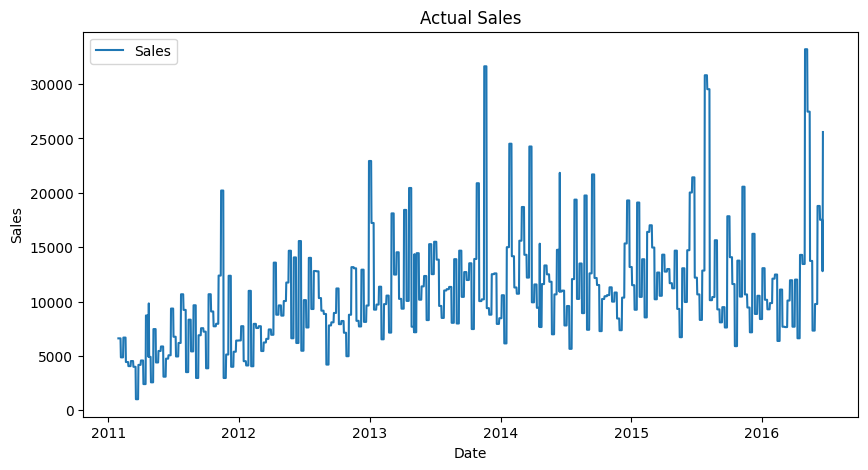

In [64]:
import matplotlib.pyplot as plt

# Plot the actual sales
plt.figure(figsize=(10, 5))
plt.plot(time_series_data['date'], time_series_data['total_sales'], label='Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual Sales')
plt.legend()
plt.show()


In [38]:
# Print the column names
print(sales_data.columns)

Index(['item_id', 'item_id_sales', 'store_id', 'store_id_sales', 'date',
       'sell_price', 'd_1', 'd_2', 'd_3', 'd_4',
       ...
       'lag_3_sales', 'lag_4_sales', 'lag_5_sales', 'lag_6_sales',
       'lag_7_sales', 'day_of_week', 'is_weekend', 'event_name', 'event_type',
       'event_indicator'],
      dtype='object', length=267)


In [39]:
sales_data.to_csv('output.csv', index=False)


In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import datetime

In [46]:
sales_data['date'] = pd.to_datetime(sales_data['date'])
daily_sales_columns = [f'd_{i}' for i in range(1, 250)]


In [47]:
time_series_data = sales_data.groupby('date')[daily_sales_columns].sum().reset_index()


In [49]:
# Sum the daily sales columns to calculate total daily sales
time_series_data['total_sales'] = time_series_data[daily_sales_columns].sum(axis=1)


In [50]:
# Sort by date
time_series_data.sort_values('date', inplace=True)

In [51]:
# Define your SARIMA model
model = SARIMAX(time_series_data['total_sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))

In [52]:
# Fit the model to historical data
train_data = time_series_data.iloc[:-7]
model_fit = model.fit(disp=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [53]:
# Print the column names
print(train_data.columns)

Index(['date', 'd_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6', 'd_7', 'd_8', 'd_9',
       ...
       'd_241', 'd_242', 'd_243', 'd_244', 'd_245', 'd_246', 'd_247', 'd_248',
       'd_249', 'total_sales'],
      dtype='object', length=251)


In [54]:
# Generate forecasts for the next 7 days
forecast_start_date = time_series_data['date'].max() + datetime.timedelta(days=1)
forecast_end_date = forecast_start_date + datetime.timedelta(days=6)
forecast = model_fit.get_forecast(steps=7)


In [55]:
# Get the forecasted sales values
forecasted_sales = forecast.predicted_mean

In [56]:
# Display the forecasted sales for the next 7 days
print(forecasted_sales)

1969    25438.642298
1970    25438.629343
1971    25438.616389
1972    25438.603438
1973    25438.590489
1974    27250.262893
1975    22713.814165
Name: predicted_mean, dtype: float64


## deployment

In [57]:
# Save the model to a file
import joblib

joblib.dump(model, 'pretrained_sarima_model.pkl')


['pretrained_sarima_model.pkl']

In [ ]:
from flask import Flask, request, jsonify
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import joblib

app = Flask(__name__)

# Load your pre-trained SARIMA model
model = joblib.load('pretrained_sarima_model.pkl')

@app.route('/forecast', methods=['POST'])
def forecast_sales():
    try:
        # Get input data from JSON request
        data = request.get_json()

        # Assuming the input contains the start date and forecast period
        start_date = pd.to_datetime(data['start_date'])
        forecast_period = int(data['forecast_period'])

        # Generate forecasts for the specified period
        forecast = model.get_forecast(steps=forecast_period, start=start_date)

        # Get the forecasted sales values
        forecasted_sales = forecast.predicted_mean

        # Convert the forecasted sales to a dictionary for response
        forecast_dict = {'start_date': start_date.strftime('%Y-%m-%d'),
                         'forecast_period': forecast_period,
                         'forecasted_sales': forecasted_sales.tolist()}

        return jsonify(forecast_dict)

    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(debug=True, port=8080, use_reloader=False)
